In [1]:

import os
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')


modules loaded


In [2]:
train_data_dir = 'C://Users//yasan//OneDrive//Desktop//ML//Data Sets//Bratin Tumour//Training'

filepaths = [os.path.join(train_data_dir, fold, file) 
             for fold in os.listdir(train_data_dir) 
             for file in os.listdir(os.path.join(train_data_dir, fold))]

labels = [fold for fold in os.listdir(train_data_dir) 
          for _ in os.listdir(os.path.join(train_data_dir, fold))]

train_df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

train_df

,filepaths,labels
0,C://Users//yasan//OneDrive//Desktop//ML//Data ...,glioma
1,C://Users//yasan//OneDrive//Desktop//ML//Data ...,glioma
2,C://Users//yasan//OneDrive//Desktop//ML//Data ...,glioma
3,C://Users//yasan//OneDrive//Desktop//ML//Data ...,glioma
4,C://Users//yasan//OneDrive//Desktop//ML//Data ...,glioma
...,...,...
5707,C://Users//yasan//OneDrive//Desktop//ML//Data ...,pituitary
5708,C://Users//yasan//OneDrive//Desktop//ML//Data ...,pituitary
5709,C://Users//yasan//OneDrive//Desktop//ML//Data ...,pituitary
5710,C://Users//yasan//OneDrive//Desktop//ML//Data ...,pituitary


In [3]:
test_data_dir = 'C://Users//yasan//OneDrive//Desktop//ML//Data Sets//Bratin Tumour//Testing'

filepaths = [os.path.join(test_data_dir, fold, file) 
             for fold in os.listdir(test_data_dir) 
             for file in os.listdir(os.path.join(test_data_dir, fold))]

labels = [fold for fold in os.listdir(test_data_dir) 
          for _ in os.listdir(os.path.join(test_data_dir, fold))]

ts_df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

ts_df

,filepaths,labels
0,C://Users//yasan//OneDrive//Desktop//ML//Data ...,glioma
1,C://Users//yasan//OneDrive//Desktop//ML//Data ...,glioma
2,C://Users//yasan//OneDrive//Desktop//ML//Data ...,glioma
3,C://Users//yasan//OneDrive//Desktop//ML//Data ...,glioma
4,C://Users//yasan//OneDrive//Desktop//ML//Data ...,glioma
...,...,...
1306,C://Users//yasan//OneDrive//Desktop//ML//Data ...,pituitary
1307,C://Users//yasan//OneDrive//Desktop//ML//Data ...,pituitary
1308,C://Users//yasan//OneDrive//Desktop//ML//Data ...,pituitary
1309,C://Users//yasan//OneDrive//Desktop//ML//Data ...,pituitary


In [5]:
valid_df, test_df = train_test_split(ts_df,  train_size= 0.8, shuffle= True, random_state= 123)

In [6]:
# crobed image size
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 1048 validated image filenames belonging to 4 classes.
Found 263 validated image filenames belonging to 4 classes.


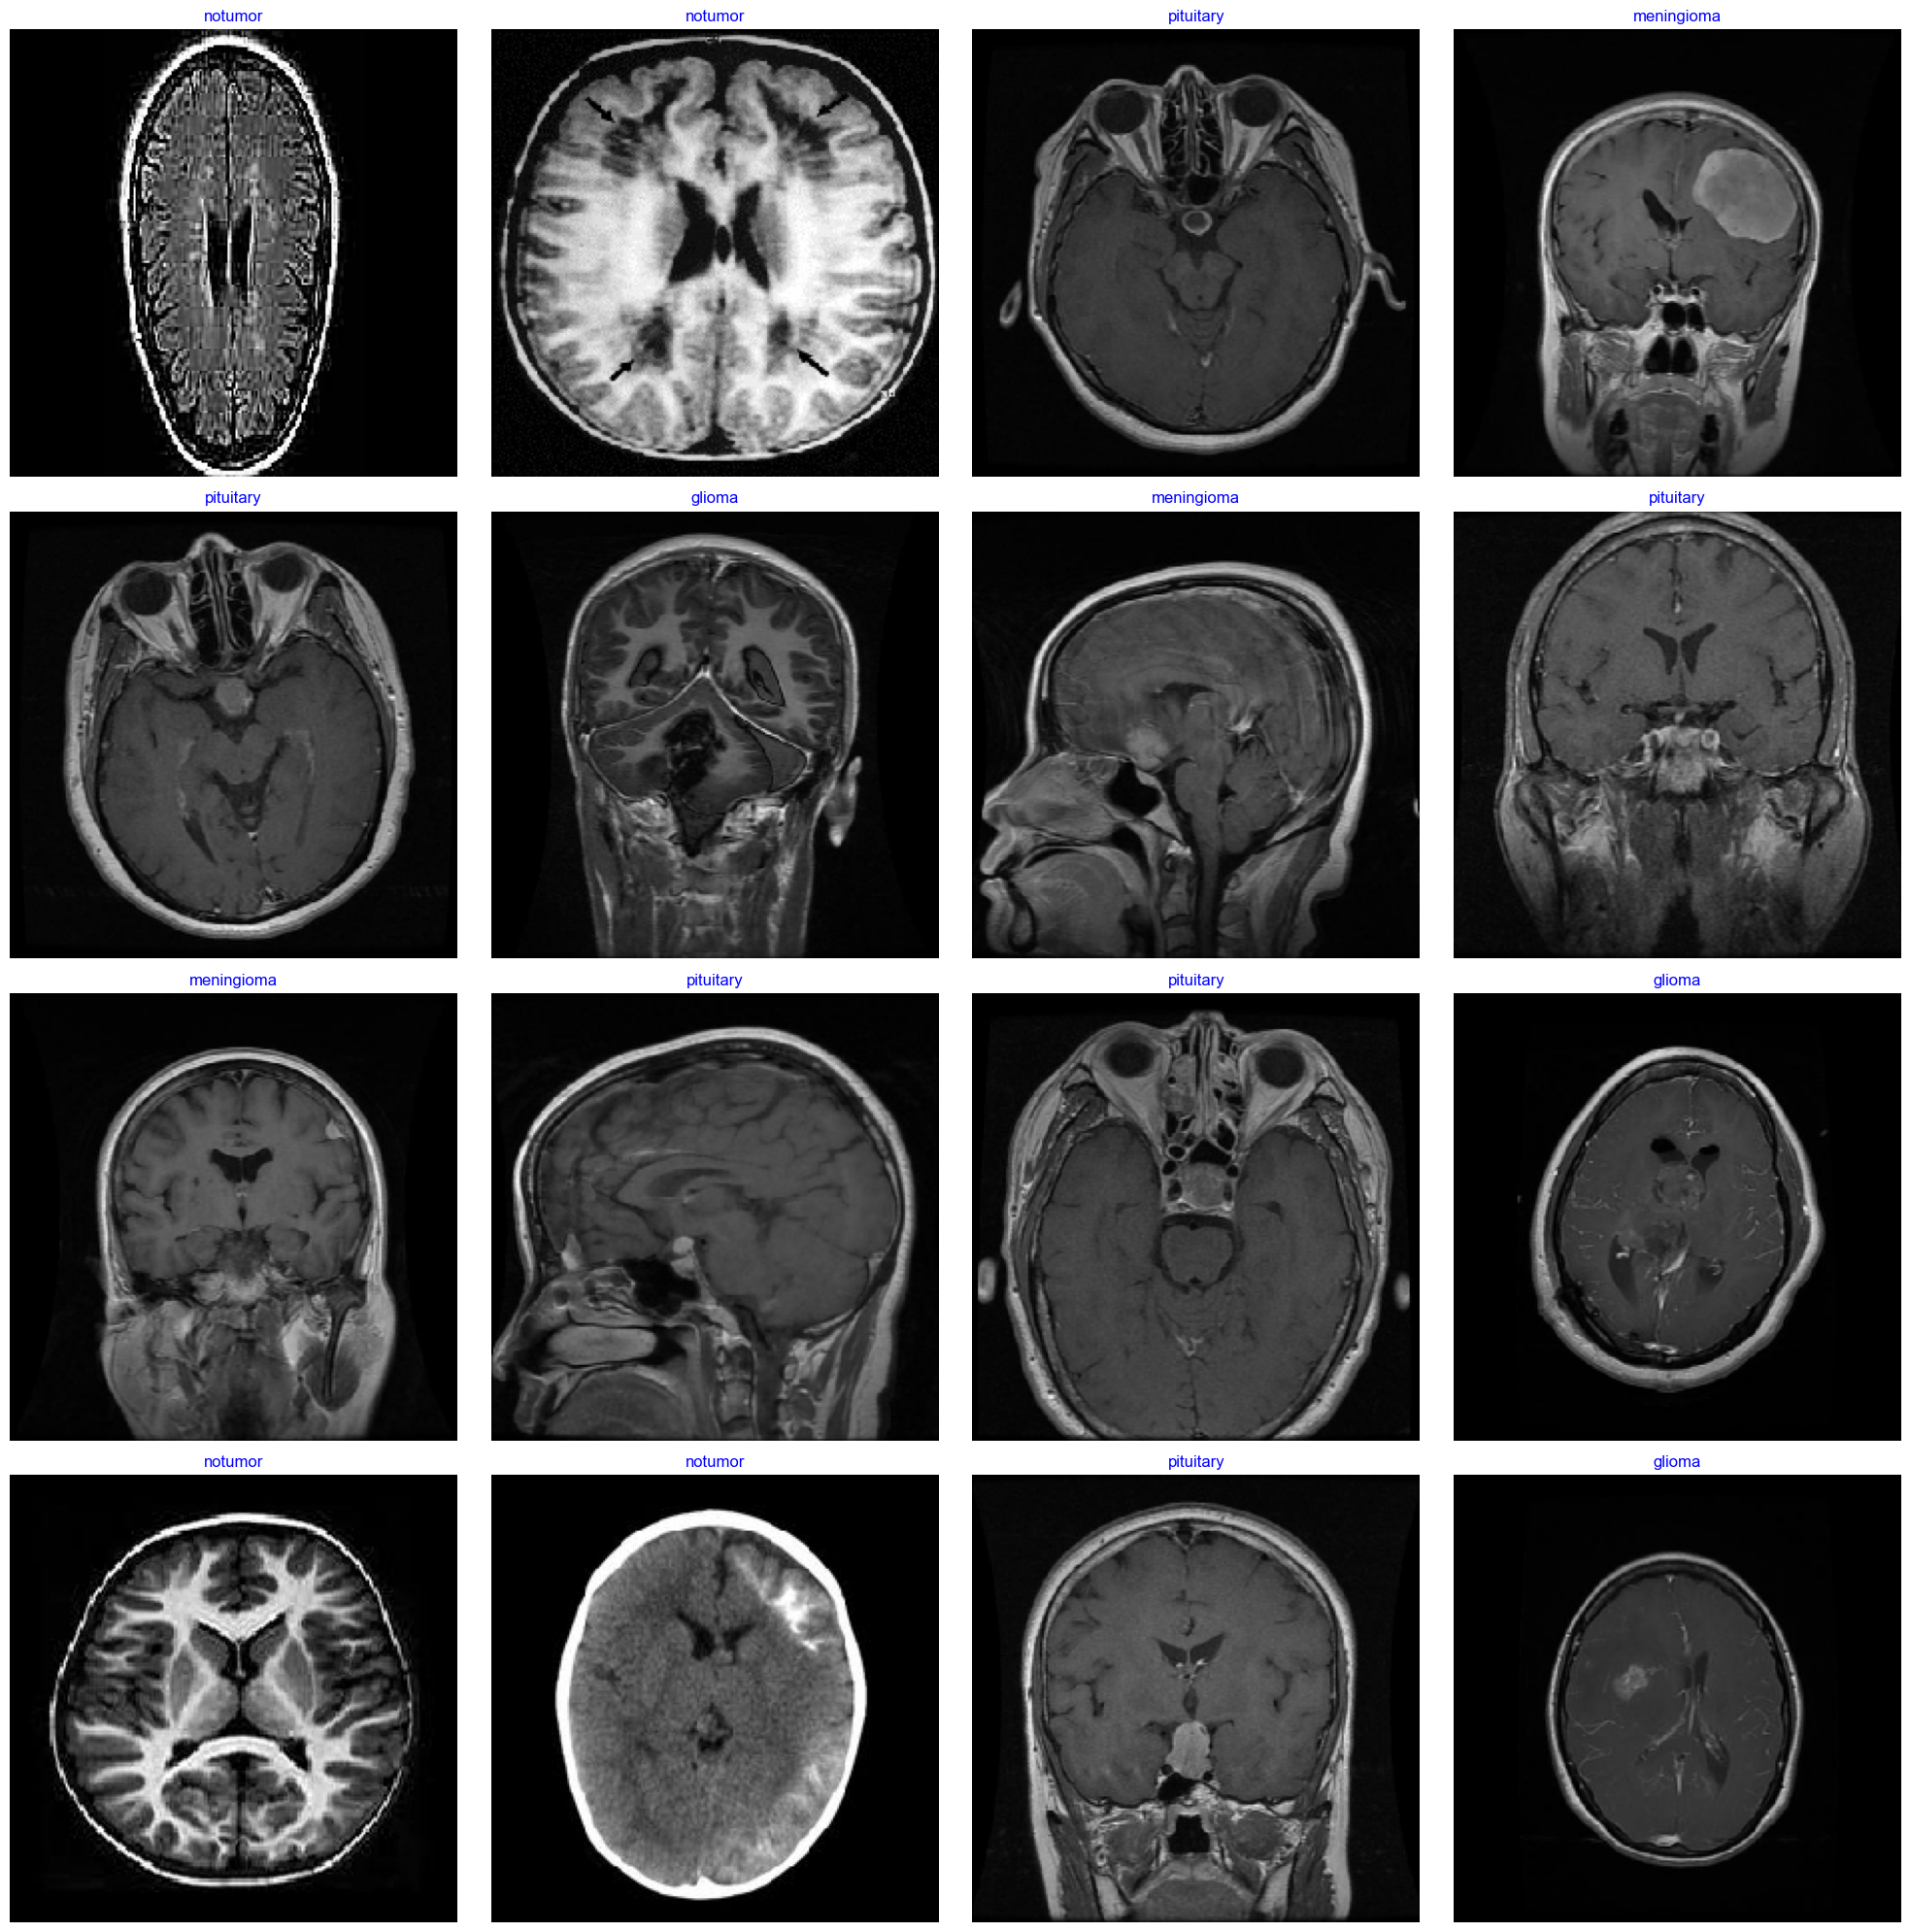

In [7]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Define the input image size and number of channels
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Determine the number of classes in the dataset
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# Define the model architecture using Sequential API
model = Sequential([
    # Convolutional layers with ReLU activation
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
     Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),  # Flatten the feature maps
    
    # Dense layers for classification
    Dense(256, activation="relu"),
    Dense(64, activation="relu"),
    Dense(class_count, activation="softmax")  # Output layer with softmax activation for multi-class classification
])

# Compile the model with optimizer, loss function, and metrics
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the model architecture
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [9]:
epochs = 15   # number of all epochs in training
history = model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/15


357/357 [==============================] - 2185s 6s/step - loss: 2.1715 - accuracy: 0.6313 - val_loss: 0.6267 - val_accuracy: 0.7338
Epoch 2/15
357/357 [==============================] - 2199s 6s/step - loss: 0.4939 - accuracy: 0.8074 - val_loss: 0.6380 - val_accuracy: 0.7395
Epoch 3/15
357/357 [==============================] - 2185s 6s/step - loss: 0.3607 - accuracy: 0.8641 - val_loss: 0.4551 - val_accuracy: 0.8330
Epoch 4/15
357/357 [==============================] - 2154s 6s/step - loss: 0.2766 - accuracy: 0.9034 - val_loss: 0.4323 - val_accuracy: 0.8626
Epoch 5/15
357/357 [==============================] - 2138s 6s/step - loss: 0.2176 - accuracy: 0.9251 - val_loss: 0.2493 - val_accuracy: 0.9074
Epoch 6/15
357/357 [==============================] - 2120s 6s/step - loss: 0.1705 - accuracy: 0.9407 - val_loss: 0.2352 - val_accuracy: 0.9208
Epoch 7/15
357/357 [==============================] - 2124s 6s/step - loss: 0.1396 - accuracy: 0.9452 - val_loss: 0.3033 - val_accurac

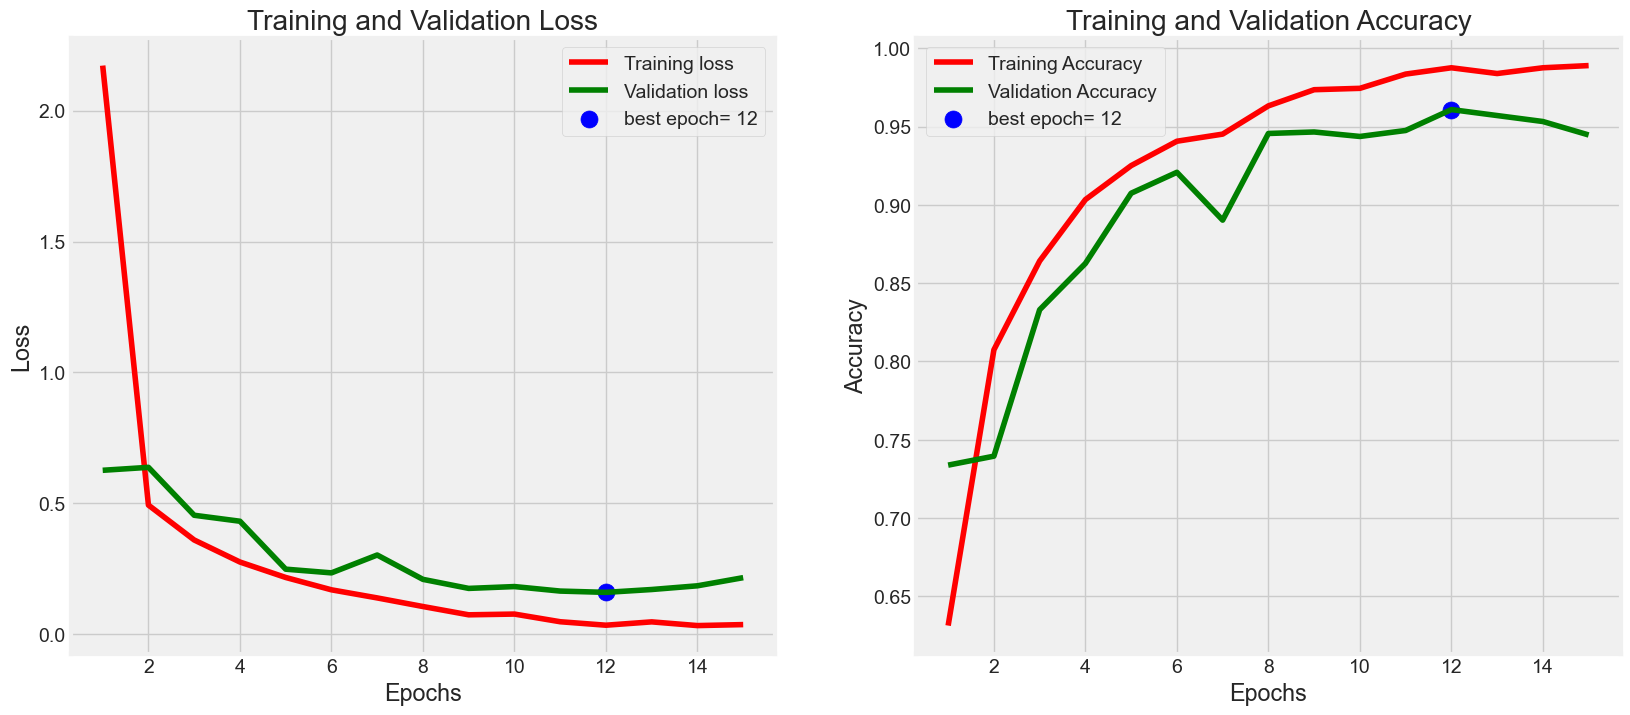

In [10]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [11]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

17/17 [==============================] - 32s 2s/step - loss: 0.1630 - accuracy: 0.9278
Train Loss:  0.05509083345532417
Train Accuracy:  0.9795168042182922
--------------------
Validation Loss:  0.21692202985286713
Validation Accuracy:  0.944656491279602
--------------------
Test Loss:  0.16295203566551208
Test Accuracy:  0.927756667137146


In [13]:
preds = model.predict_generator(test_gen)  # [0.00001, 95.12312, 0.0021, 3.12313]
y_pred = np.argmax(preds, axis=1) 

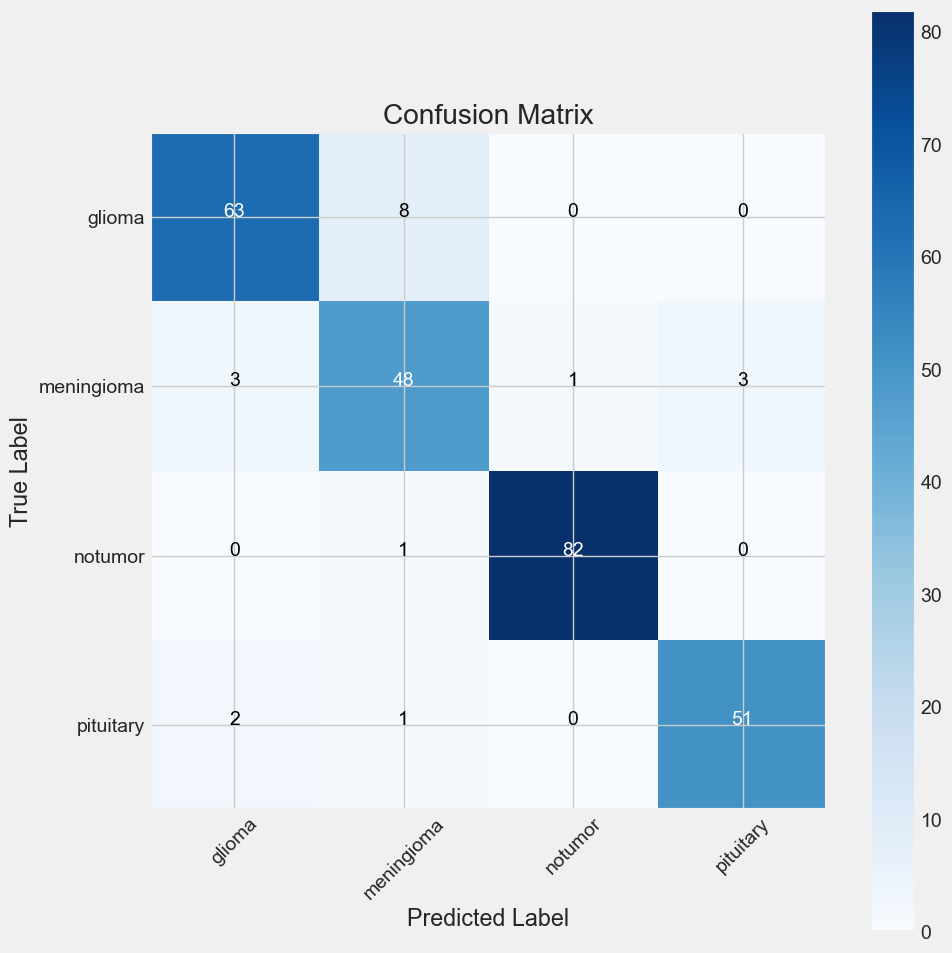

In [14]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [15]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.93      0.89      0.91        71
  meningioma       0.83      0.87      0.85        55
     notumor       0.99      0.99      0.99        83
   pituitary       0.94      0.94      0.94        54

    accuracy                           0.93       263
   macro avg       0.92      0.92      0.92       263
weighted avg       0.93      0.93      0.93       263



In [16]:
model.save('Brain Tumors.h5')

In [17]:
loaded_model = tf.keras.models.load_model('Brain Tumors.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [20]:
image_path = 'C:\\Users\\yasan\\OneDrive\\Desktop\\ML\\Data Sets\\Bratin Tumour\\Pituitary.png'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
#predictions = loaded_model.predict(img_array)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
print(f"{class_labels[3]}")

Pituitary
